# CS F429 - NLP Project
Project 1: Grammar Check for English Language

## Problem Statement
Part 1: Build a grammar checker using the concepts taught in class, you will be given a corpus with some paragraphs labeled
correct and unknown; correct paragraphs have no grammatical errors, while unknown may/may not have sentences
which have grammatical errors in them. The task is to find all the sentences that have these errors. For example: “In the
country there lived a fox. The quick brown fox jump over the fence. Farmer Shaun was terrified.” In this paragraph, the
sentence “The quick brown fox jump over the fence” is grammatically incorrect.

## Introduction

### Importing libraries

In [1]:
!pip install dill
!pip install -U nltk

In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import random
import time
import nltk
import random
import spacy
import ssl
from numpy import inf

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import brown

# from google.colab import drive
# drive.mount('/content/gdrive')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/adarshnandanwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /home/adarshnandanwar/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adarshnandanwar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/adarshnandanwar/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
# BASE_DIR = 'gdrive/MyDrive/nlp_project'
BASE_DIR = os.getcwd()
DATASET_PATH = os.path.join(BASE_DIR, 'dataset', 'NLP_Q1')
CLEAN_DATASET_PATH = os.path.join(DATASET_PATH, 'clean')
UNKNOWN_DATASET_PATH = os.path.join(DATASET_PATH, 'unknown')

PRINT_LIMIT = 3

### Importing dataset

In [4]:
# Extracting dataset
from zipfile import ZipFile

if not os.path.isdir(DATASET_PATH):
    dataset_zip_path = os.path.join(BASE_DIR, 'dataset', 'Topic 1.zip')
    dataset_extrat_path = os.path.join(BASE_DIR, 'dataset')
    with ZipFile(dataset_zip_path, 'r') as zip:
        zip.printdir()
        zip.extractall(dataset_extrat_path)
        print('Done!')
else:
    print('Dataset already extracted')

Dataset already extracted


In [5]:
# Reading clean dataset
clean_text_list = []
for file_name in os.listdir(CLEAN_DATASET_PATH):
    text = open(os.path.join(CLEAN_DATASET_PATH, file_name)).read()
    clean_text_list.append(text)

print(f'Size of clean dataset: {len(clean_text_list)}')
print(f'===========================\n')
print('\n\n'.join(random.sample(clean_text_list, PRINT_LIMIT)))

Size of clean dataset: 6969

`` Mr. Hearst '' , Lane replied as he left , `` if you ever get a telegram from me asking you to do anything , you can put the telegram down as a forgery '' .

He cleaned his shovel , left it against the fence , picked up his Winchester , and started downstream . His visitors had crawled through the south fence and were crossing the meadow , angling toward the house . Now he saw that both the man and woman were moving slowly and irregularly , staggering , as if they found it a struggle to remain on their feet .

Only in its final scene , where Beatie Bryant ( Mary Doyle ) shakes off the disappointment of being jilted by her intellectual lover and proclaims her emancipation do we get much which makes worthwhile the series of boorish rustic happenings we have had to watch for most of the first two and one-half acts .


In [6]:
# Reading unknown dataset
unknown_text_list = []
for file_name in os.listdir(UNKNOWN_DATASET_PATH):
    text = open(os.path.join(UNKNOWN_DATASET_PATH, file_name)).read()
    unknown_text_list.append(text)

print(f'Size of unknown dataset: {len(unknown_text_list)}')
print(f'=============================\n')
print('\n\n'.join(random.sample(unknown_text_list, PRINT_LIMIT)))

Size of unknown dataset: 8698

``er ` All these kind of things weaken us '' , Perlman said .

The telephone ranger .

Suddenly there was a commotion upstairs , a despairing boyish shriek , and the strains of the waltz faltered and died as the musicians and guests gaped at an apparition descending thest marble staircase .


In [7]:
from nltk.tokenize import sent_tokenize

def segmentation(corpus):
    segmented_corpus = []
    map_to_corpus_index = []
    for i, text in enumerate(corpus):
        splits = sent_tokenize(text)
        segmented_corpus.extend(splits)
        map_to_corpus_index.extend([i for x in range(len(splits))])
    return segmented_corpus, map_to_corpus_index

In [8]:
from nltk.tokenize import word_tokenize

def tokenization(segmented_corpus):
    tokenized_corpus = []
    for text in segmented_corpus:
        tokenized_corpus.append(word_tokenize(text))
    return tokenized_corpus

In [9]:
segmented_clean_text_list, map_to_corpus_index = segmentation(clean_text_list)
tokenized_clean_text_list = tokenization(segmented_clean_text_list)

print('Segmentation of clean data')
print('==========================\n')
print('\n\n'.join(segmented_clean_text_list[:PRINT_LIMIT]))
print('\n\nTokenization of clean data')
print('==========================\n')
for i in range(PRINT_LIMIT):
    print(tokenized_clean_text_list[i], end='\n\n')

Segmentation of clean data

The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .

It urged that the next Legislature `` provide enabling funds and re-set the effective date so that an orderly implementation of the law may be effected '' .

The grand jury took a swipe at the State Welfare Department's handling of federal funds granted for child welfare services in foster homes .


Tokenization of clean data

['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', '``', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']

['It', 'urged', 'that', 'the', 

In [10]:
segmented_unknown_text_list, map_to_corpus_index = segmentation(unknown_text_list)
tokenized_unknown_text_list = tokenization(segmented_unknown_text_list)

print('Segmentation of unknown data')
print('============================\n')
print('\n\n'.join(segmented_unknown_text_list[:PRINT_LIMIT]))
print('\n\nTokenization of unknown data')
print('============================\n')
for i in range(PRINT_LIMIT):
    print(tokenized_unknown_text_list[i], end='\n\n')

Segmentation of unknown data

The Fulton County Grand Jury say Friday an investigation of Atlanta 's recent primary election produced ` ` no evidence '' that any irregularities took place .

` ` This is one of the major items in the Fulton County general assistance program '' , the jury said , but the State Welfare Department ` ` has seen fit to distribute these funds through the welfare departments of all the counties in the state with the exception of Fulton County , which receives reform none of this money .

The jurors said they realize ` ` a proportionate distribution of these funder might disable this program in our less populous counties '' .


Tokenization of unknown data

['The', 'Fulton', 'County', 'Grand', 'Jury', 'say', 'Friday', 'an', 'investigation', 'of', 'Atlanta', "'s", 'recent', 'primary', 'election', 'produced', '`', '`', 'no', 'evidence', '``', 'that', 'any', 'irregularities', 'took', 'place', '.']

['`', '`', 'This', 'is', 'one', 'of', 'the', 'major', 'items', 'in'

### Dataset Analysis

In [11]:
# Building list of all tokens in clean data
token_list_clean = list()
for i in range(len(tokenized_clean_text_list)):
    token = tokenized_clean_text_list[i]
    for j in range(len(token)):
        token_list_clean.append(token[j])
        
# Building set of all tokens in clean data
token_set_clean = set()
for i in range(len(tokenized_clean_text_list)):
    token = tokenized_clean_text_list[i]
    for j in range(len(token)):
        token_set_clean.add(token[j])

In [12]:
# Building list of all tokens in unknown data
token_list_unknown = list()
for i in range(len(tokenized_unknown_text_list)):
    token = tokenized_unknown_text_list[i]
    for j in range(len(token)):
        token_list_unknown.append(token[j])

# Building set of all tokens in unknown data
token_set_unknown = set()
for i in range(len(tokenized_unknown_text_list)):
    token = tokenized_unknown_text_list[i]
    for j in range(len(token)):
        token_set_unknown.add(token[j])

In [13]:
# Calculating function words in clean set
from nltk.corpus import stopwords
from nltk.corpus import words
stop_words = set(stopwords.words('english'))
unclassified_words = set(words.words())
content_words = unclassified_words-stop_words
num_function_words = 0
num_content_words = 0
for i in range(len(token_list_clean)):
    if(token_list_clean[i] in stop_words):
        num_function_words+=1
    elif(token_list_clean[i] in content_words):
        num_content_words+=1
num_total_words = num_function_words+num_content_words

print(f"Number of function words:", num_function_words)
print(f"Number of content words:", num_content_words)

Number of function words: 192960
Number of content words: 171816


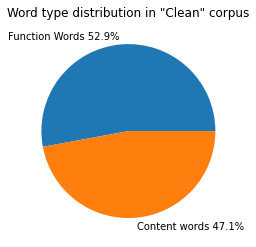

In [14]:
import matplotlib.pyplot as plt
import numpy as np
function_word_percent = round(num_function_words/num_total_words * 100,2)
content_word_percent = round(num_content_words/num_total_words * 100,2)
y = np.array([num_function_words, num_content_words])
mylabels = ["Function Words "+str(function_word_percent)+"%", "Content words "+str(content_word_percent)+"%"]

plt.pie(y, labels = mylabels)
plt.title('Word type distribution in "Clean" corpus')
plt.show()

In [15]:
# Demonstrating Zipf's law
def CountFrequency(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [16]:
mp = CountFrequency(token_list_unknown)

num_list = []
for key in mp.keys():
    num_list.append(mp[key])

num_list.sort(reverse = True)
num_list = num_list[:80]

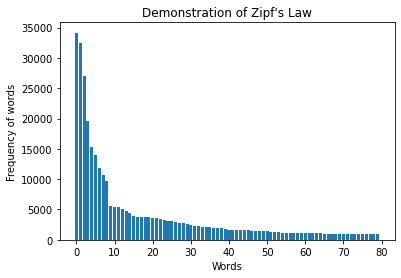

In [17]:
plt.bar(list(range(len(num_list))),num_list)
plt.xlabel("Words")
plt.ylabel("Frequency of words")
plt.title("Demonstration of Zipf's Law")
plt.show()

In [18]:
# Calculation of unknown words in test set

num_unknown_words = 0
test_tokens = list(token_set_unknown)
clean_tokens = list(token_set_clean)
for i in range(len(test_tokens)):
    if(test_tokens[i] not in clean_tokens):
        num_unknown_words+= mp[test_tokens[i]]

print(f"Number of unknown words: ", num_unknown_words)
if num_unknown_words > 0:
    print("OOV words detected!")

Number of unknown words:  45107
OOV words detected!


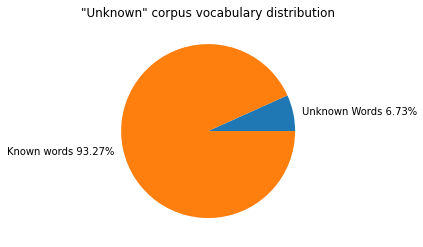

In [19]:
unknown_word_percent = round(num_unknown_words/(len(token_list_unknown)) * 100,2)
known_word_percent = round((len(token_list_unknown)-num_unknown_words)/(len(token_list_unknown)) * 100,2)
y = np.array([num_unknown_words, len(token_list_unknown)-num_unknown_words])
mylabels = ["Unknown Words "+str(unknown_word_percent)+"%", "Known words "+str(known_word_percent)+"%"]
plt.pie(y, labels = mylabels)
plt.title('"Unknown" corpus vocabulary distribution')
plt.show()

## POS Tagging
- We have implemented 2 methods to do POS tagging

### 1. Hiden Markov Model
We can use hidden markov model to do POS tagging on the token. In the below function, we first find the required probabilities (emission probability, transition probability) using the brown corpus made available by nltk library and use these probabilities to do POS tagging on the given training and testing dataset using Viterbi algorithm.

In [20]:
def training_hmm():
    
    print('Training HMM model ......')
    
    sent_tag = brown.tagged_sents()
    train_data=[]
    for s in sent_tag:
        s.insert(0,('<s>','<s>'))
        s.append(('</s>','</s>'))
        train_data.append(s)
    
    train_word_tag = {}
    for s in train_data:
        for (w,t) in s:
            w=w.lower()
            try:
                try:
                    train_word_tag[t][w]+=1
                except:
                    train_word_tag[t][w]=1
            except:
                train_word_tag[t]={w:1}
        
    train_emission_prob={}
    for k in train_word_tag.keys():
        train_emission_prob[k]={}
        count = sum(train_word_tag[k].values())
        for k2 in train_word_tag[k].keys():
            train_emission_prob[k][k2]=train_word_tag[k][k2]/count
            
    print('Calculated emission probability .........')
            
    bigram_tag_data = {}
    for s in train_data:
        bi=list(nltk.bigrams(s))
        for b1,b2 in bi:
            try:
                try:
                    bigram_tag_data[b1[1]][b2[1]]+=1
                except:
                    bigram_tag_data[b1[1]][b2[1]]=1
            except:
                bigram_tag_data[b1[1]]={b2[1]:1}
                
    bigram_tag_prob={}
    for k in bigram_tag_data.keys():
        bigram_tag_prob[k]={}
        count=sum(bigram_tag_data[k].values())
        for k2 in bigram_tag_data[k].keys():
            bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count
            
    print('Calculated bigram transition probability .........')
            
    
    tags_of_tokens = {}
    count=0
    for s in train_data:
        for (w,t) in s:
            w=w.lower()
            try:
                if t not in tags_of_tokens[w]:
                    tags_of_tokens[w].append(t)
            except:
                l = []
                l.append(t)
                tags_of_tokens[w] = l
    
    print('Model training completed .........')
    
    return bigram_tag_prob, train_emission_prob, tags_of_tokens

In [21]:
def find_pos_tags_hmm(bigram_tag_prob, train_emission_prob, tags_of_tokens, string_seq):
    string_seq.append('</s>')
    string_seq.insert(0,'<s>')
    s = string_seq
    # storing_values is a dictionary which stores the required values          
    storing_values = {}              
    for q in range(len(s)):
        step = s[q]
        # for the starting word of the sentence
        if q == 1:                
            storing_values[q] = {}
            try:
                tags = tags_of_tokens[step]
            except:
                # print(step+'.....')
                tags = ['UNK']
            for t in tags:
                # this is applied since we do not know whether the word in the test data is present in train data or not
                try:
                    storing_values[q][t] = ['<s>',bigram_tag_prob['<s>'][t]*train_emission_prob[t][step]]
                # if word is not present in the train data but present in test data we assign a very low probability of 0.0001
                except:
                    storing_values[q][t] = ['<s>',0.0001]
    
        # if the word is not at the start of the sentence
        if q>1:
            storing_values[q] = {}
            previous_states = list(storing_values[q-1].keys())  
            try:
                current_states  = tags_of_tokens[step]      
            except:
                current_states = ['UNK']
            # calculation of the best previous state for each current state and then storing it in storing_values
            for t in current_states:                             
                temp = []
                for pt in previous_states:                         
                    try:
                        temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
                    except:
                        temp.append(storing_values[q-1][pt][1]*0.0001)
                max_temp_index = temp.index(max(temp))
                best_pt = previous_states[max_temp_index]
                storing_values[q][t]=[best_pt,max(temp)]

    # Backtracing to extract the best possible tags for the sentence
    pred_tags = []
    total_steps_num = storing_values.keys()
    last_step_num = max(total_steps_num)
    for bs in range(len(total_steps_num)):
        step_num = last_step_num - bs
        if step_num == last_step_num:
            pred_tags.append('</s>')
            pred_tags.append(storing_values[step_num]['</s>'][0])
        if step_num<last_step_num and step_num>0:
            pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
    return list(reversed(pred_tags[1:-1]))

In [22]:
bigram_tag_prob, train_emission_prob, tags_of_tokens = training_hmm()

Training HMM model ......
Calculated emission probability .........
Calculated bigram transition probability .........
Model training completed .........


In [23]:
find_pos_tags_hmm(bigram_tag_prob, train_emission_prob, tags_of_tokens, ['that','is','a','human'])

['DT', 'BEZ', 'AT', 'JJ']

### Method 2. Spacy Library
We can use spacy `en_core_web_sm` which is a english pipeline trained on various corpora to do POS tagging on the given training and testing dataset.

In [24]:
def train_spacy_pos():
    print('Training spacy model ......')
    nlp_spacy = spacy.load("en_core_web_sm")
    print('Training spacy model completed ......')
    return nlp_spacy

In [25]:
def find_pos_tags_spacy(nlp_spacy , text):
    text = ' '.join(text)
    doc = nlp_spacy(text)
    token = [token.tag_  for token in doc]    
    return token

In [26]:
nlp_spacy = train_spacy_pos()

Training spacy model ......
Training spacy model completed ......


In [27]:
find_pos_tags_spacy(nlp_spacy , ['that','is','a','sample', 'text'])
find_pos_tags_spacy(nlp_spacy , ['that','is','a','human'])

['DT', 'VBZ', 'DT', 'JJ']

## Language Model

### Importing dataset

In [28]:
from sklearn.model_selection import train_test_split
clean_text_list, clean_text_dev_list = train_test_split(clean_text_list, test_size=0.1)

print(f'Size of clean train set:\t{len(clean_text_list)}')
print(f'Size of clean dev set:\t\t{len(clean_text_dev_list)}')

Size of clean train set:	6272
Size of clean dev set:		697


### N-gram Model

In [29]:
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.util import pad_sequence
from nltk.lm import Laplace
from nltk.lm import MLE
from nltk.lm import Vocabulary
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [30]:
def convert_to_pos_tags(tokenized_corpus, pos_type=None):
    # POS tagging
    pos_tag_corpus = []
    if pos_type == 'hmm':
        print("Replacing tokens with POS tags using HMM")
        for sequence in tokenized_corpus:
            pos_tag_corpus.append(find_pos_tags_hmm(bigram_tag_prob, train_emission_prob, tags_of_tokens, sequence))
        return pos_tag_corpus
    elif pos_type == 'spacy':
        print("Replacing tokens with POS tags using spacy")
        for sequence in tokenized_corpus:
            pos_tag_corpus.append(find_pos_tags_spacy(nlp_spacy, sequence))
        return pos_tag_corpus
    else:
        print("POS tagging method not selected. No changes made.")
        return tokenized_corpus

In [31]:
def train_ngram_model(n_value, tokenized_corpus, verbose=False):
    print(f'{"Sequences in corpus:":50}{len(tokenized_corpus)}')
    total_tokens = 0
    for sequence in tokenized_corpus:
        total_tokens += len(sequence)
    print(f'{"Total tokens in corpus:":50}{total_tokens}')
    
    # padding <s> and </s>
    print("Padding sequences with <s> and </s> tokens")
    padded_sequences = []
    for i in range(len(tokenized_corpus)):
        padded_tokens = list(pad_sequence(tokenized_corpus[i],
                                          pad_left=True, left_pad_symbol="<s>",
                                          pad_right=True, right_pad_symbol="</s>",
                                          n=n_value))
        padded_sequences.append(padded_tokens)
    if verbose:
        print('eg.', padded_sequences[0])
            
    # create vocabulary
    print("Creating vocabulary")
    vocabulary = list(flatten(padded_sequences))
    print(f'{"Flattened sequence size":50}{len(vocabulary)}')
    print(f'{"Flattened sequence set size":50}{len(set(vocabulary))}')
    # replace tokens below cutoff freq with <UNK> token
    vocab = Vocabulary(vocabulary, unk_cutoff=2)
    print(f'{"Vocabulary with <UNK> cutoff size":50}{len(vocab)}')
    
    # grouping into group size of `n_value`
    print("Creating n-grams")
    ngram_sequences = []
    for text in padded_sequences:
        ngram_sequences.append(list(ngrams(text, n=n_value)))
    if verbose:
        print('eg.', ngram_sequences[0][:PRINT_LIMIT])
    
    total_ngrams = 0
    for sequence in ngram_sequences:
        total_ngrams += len(sequence)
    print(f'{"Total ngram sequences:":50}{len(ngram_sequences)}\n{"Total ngrams:":50}{total_ngrams}')
        
    # language model
    print("Creating language model")
    model = Laplace(n_value)
    model.fit(ngram_sequences, vocab)
    print(f'{"Model vocab size:":50}{len(model.vocab)}')
    # print(f"Grand total number of ngrams stored:\t{model.N()}")
    # print(f'{"Total n-grams of size "+str(n_value)+" in model:":50}{len(model.counts[n_value].items())}')
    
    sequence_scores = []
    sequence_token_scores = []
    for ngram_sequence in ngram_sequences:
        sequence_score = 0
        sequence_token_score = []
        for group in ngram_sequence:
            score = model.logscore(group[-1], group[:-1])
            sequence_score += score
            sequence_token_score.append(score)
        # sequence_scores.append(sequence_score)
        sequence_scores.append(sequence_score/len(ngram_sequence))
        sequence_token_scores.append(sequence_token_score)
        
    return {
        'padded_sequences': padded_sequences,
        'vocabulary': vocab,
        'ngram_sequences': ngram_sequences,
        'model': model,
        'sequence_scores': sequence_scores,
        'sequence_token_scores': sequence_token_scores
    }    

In [32]:
# def filter_using_token_score(n_value, model, ngram_sequences, log_cutoff, verbose=False):
#     # finding suspect ngrams using individual token cutoffs
    
#     print('Filtering sequences based on individual token scores')
#     suspect_entries = []
#     suspect_sequences = []
#     for ngram_sequence in ngram_sequences:
#         is_suspect = False
#         for group in ngram_sequence:
#             score = model.logscore(group[-1], group[:-1])
#             if score < log_cutoff:
#                 is_suspect = True
#                 suspect_entries.append({
#                     'token': group[-1],
#                     'context': group[:-1],
#                     'sequence': ngram_sequence,
#                     'score': score
#                 })
#         if is_suspect:
#             suspect_sequences.append(ngram_sequence)
#     if verbose:
#         print(f'Suspect sequences based on individual token scores:\t{len(suspect_sequences)}/{len(ngram_sequences)}')
#     return suspect_entries, suspect_sequences

In [33]:
def filter_using_sequence_score(n_value, ngram_sequences, sequence_scores, log_cutoff, verbose=False):
    # finding suspect sequences using sequence cutoffs
    
    print('Filtering sequences based on sequence scores')
    suspect_indexes = []
    for i in range(len(ngram_sequences)):
        if sequence_scores[i] < log_cutoff:
            suspect_indexes.append(i)
    if verbose:
        print(f'{"Suspect sequences based on sequence scores:":50}{len(suspect_indexes)}/{len(ngram_sequences)}')
    return suspect_indexes

In [34]:
def plot_continuous_freq_dist(values, xlabel, ylabel, title, bins=50, cutoff=None):
    # plot freq distribution for cutoff visualization
    plt.rcParams.update({'figure.figsize':(10, 3)})
    plt.hist(values, bins=bins)
    if cutoff:
        plt.axvline(x=cutoff, color='red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel);
    plt.show()

In [35]:
def get_sequence_score_cutoff(sequence_scores, alpha=0.05):
    scores = sequence_scores.copy()
    n = len(scores)
    scores.sort()
    index = max(0, min(n-1, int(n*alpha)))
    return scores[index]

In [36]:
n_values = [i+1 for i in range(5)]
# token_log_cutoffs = {1: -30, 2: -21, 3: -30, 4: -25}
# alpha: used to calculate score cutoff
alpha = 0.02
pos_type = 'spacy'

In [37]:
def train_lm(n_values, train_corpus, alpha):
    ngram_data = dict()
    for n_value in n_values:
        print(f"Training {n_value}-gram model")
        ngram_model_info = train_ngram_model(n_value, train_corpus, verbose=False)
        ngram_data[n_value] = ngram_model_info

        # filter_using_token_score(n_value, ngram_model_info['model'], ngram_model_info['ngram_sequences'], token_log_cutoffs[n_value], verbose=True)

        sequence_score_log_cutoff = get_sequence_score_cutoff(ngram_model_info['sequence_scores'], alpha=alpha)
        filter_using_sequence_score(n_value, ngram_model_info['ngram_sequences'], ngram_model_info['sequence_scores'], 
                                    sequence_score_log_cutoff, verbose=True)
        print(f'{"Sequence score cutoff:":50}{sequence_score_log_cutoff}\n')
        ngram_data[n_value]['score_cutoff'] = sequence_score_log_cutoff

        plot_continuous_freq_dist(ngram_model_info['sequence_scores'], xlabel='Sequence score', 
                                  ylabel='Frequency', title='Sequence score frequency distribution', bins=200, 
                                  cutoff=sequence_score_log_cutoff)
    return ngram_data

Training 1-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           519936
Flattened sequence set size                       35849
Vocabulary with <UNK> cutoff size                 18672
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     519936
Creating language model
Model vocab size:                                 18673
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -11.563575703587231



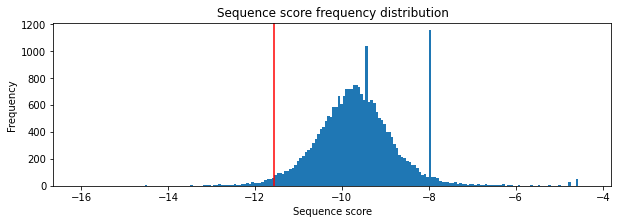

Training 2-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           570728
Flattened sequence set size                       35851
Vocabulary with <UNK> cutoff size                 18674
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     545332
Creating language model
Model vocab size:                                 18675
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -11.679081553782094



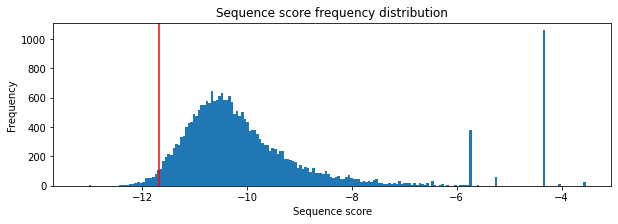

Training 3-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           621520
Flattened sequence set size                       35851
Vocabulary with <UNK> cutoff size                 18674
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     570728
Creating language model
Model vocab size:                                 18675
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -12.611090158815314



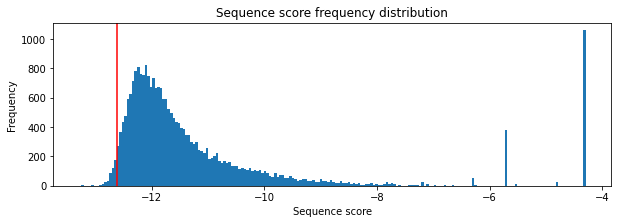

Training 4-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           672312
Flattened sequence set size                       35851
Vocabulary with <UNK> cutoff size                 18674
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     596124
Creating language model
Model vocab size:                                 18675
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -12.824683729798359



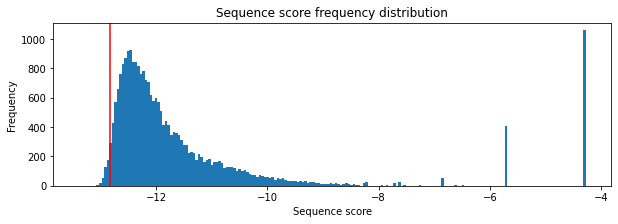

Training 5-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           723104
Flattened sequence set size                       35851
Vocabulary with <UNK> cutoff size                 18674
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     621520
Creating language model
Model vocab size:                                 18675
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -12.873724621771752



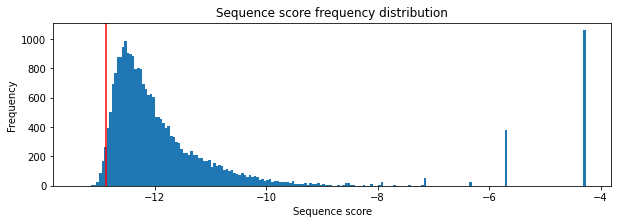

In [38]:
# Text n-gram model
ngram_data_text = train_lm(n_values, tokenized_clean_text_list, alpha=alpha)

In [39]:
wrong = np.array(ngram_data_text[2]['sequence_scores']) == -4.383958736781427
for i in np.array(segmented_clean_text_list)[wrong]:
    print(i, end="\n\n")

Replacing tokens with POS tags using spacy
Training 1-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           535128
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           535128
Flattened sequence set size                       49
Vocabulary with <UNK> cutoff size                 48
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     535128
Creating language model
Model vocab size:                                 49
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -5.493683275892282



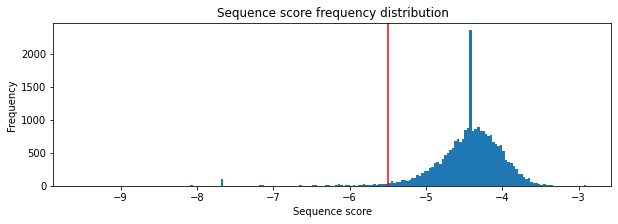

Training 2-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           535128
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           585920
Flattened sequence set size                       51
Vocabulary with <UNK> cutoff size                 50
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     560524
Creating language model
Model vocab size:                                 51
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       504/25396
Sequence score cutoff:                            -4.301213455026503



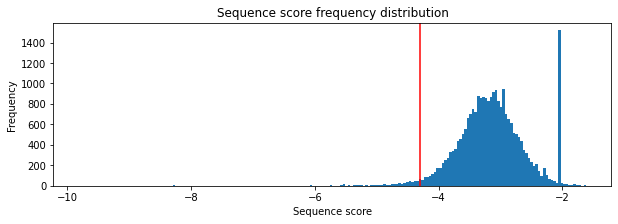

Training 3-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           535128
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           636712
Flattened sequence set size                       51
Vocabulary with <UNK> cutoff size                 50
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     585920
Creating language model
Model vocab size:                                 51
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -3.7886768843864425



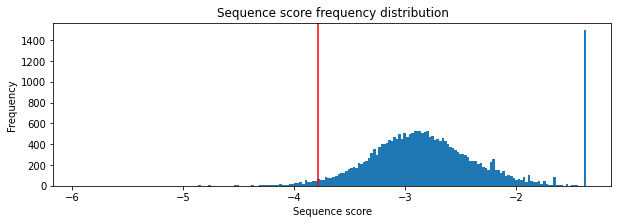

Training 4-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           535128
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           687504
Flattened sequence set size                       51
Vocabulary with <UNK> cutoff size                 50
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     611316
Creating language model
Model vocab size:                                 51
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -3.7514930873713044



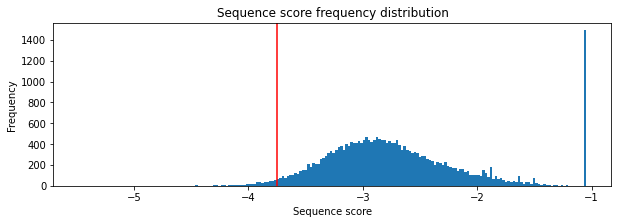

Training 5-gram model
Sequences in corpus:                              25396
Total tokens in corpus:                           535128
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size                           738296
Flattened sequence set size                       51
Vocabulary with <UNK> cutoff size                 50
Creating n-grams
Total ngram sequences:                            25396
Total ngrams:                                     636712
Creating language model
Model vocab size:                                 51
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       507/25396
Sequence score cutoff:                            -3.9470893568207073



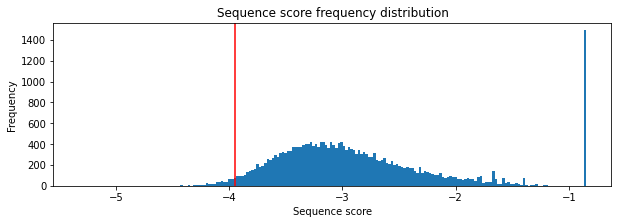

In [40]:
# POS tag n-gram model
clean_pos_tag_list = convert_to_pos_tags(tokenized_clean_text_list, pos_type=pos_type)
ngram_data_pos = train_lm(n_values, clean_pos_tag_list, alpha=alpha)

In [41]:
# Print sample information learned from model

unigram_list = ['<s>', 'of', 'the', 'The', '<UNK>']
# [token, context]
ngram_list = [
    ['The', '<s>'], 
    ['the', 'of'], 
    ['a', 'is'],
    ['a', 'This is'],
    ['a', 'this is'],
    ['The', '<s> <s>'], 
    ['<UNK>', 'What is']
]

heading_df = ['N-gram', 'Context', 'Token', 'Count', 'Score', 'Log Score']
list_to_df = []
for token in unigram_list:
    list_to_df.append([
        '1', '', token, 
        ngram_data_text[1]['model'].counts[token], 
        ngram_data_text[1]['model'].score(token), 
        ngram_data_text[1]['model'].logscore(token)
    ])
for token in ngram_list:
    n_value = len(token[1].split())+1
    if n_value not in n_values:
        raise ValueError(f'{n_value}-gram model not available for the given context size {n_value-1} of "{token[1]}".')
    list_to_df.append([
        n_value, token[1], token[0], 
        ngram_data_text[n_value]['model'].counts[token[1].split()][token[0]], 
        ngram_data_text[n_value]['model'].score(token[0], token[1].split()), 
        ngram_data_text[n_value]['model'].logscore(token[0], token[1].split())
    ])

display(pd.DataFrame(list_to_df, columns = heading_df))

,N-gram,Context,Token,Count,Score,Log Score
0,1,,<s>,0,0.031895,-4.970520
1,1,,of,15977,0.029665,-5.075080
2,1,,the,27816,0.051646,-4.275200
3,1,,The,3161,0.005871,-7.412257
4,1,,<UNK>,17178,0.031895,-4.970520
5,2,<s>,The,2783,0.063171,-3.984599
6,2,of,the,4218,0.121753,-3.037966
7,2,is,a,383,0.016572,-5.915132
8,3,This is,a,18,0.001012,-9.948905
9,3,this is,a,13,0.000746,-10.388632


## Model Evaluation

### Shannon Visualization

In [42]:
def get_sentence_from_tokens(tokens):
    filtered_tokens = []
    for token in tokens:
        if token in ['<s>', '</s>']:
            continue
        else:
            filtered_tokens.append(token)
    return ' '.join(filtered_tokens)

In [43]:
from nltk.probability import MLEProbDist

def shannon_visualization(n_value, model, max_len=50, verbose=False):
    sentence = ""
    if n_value == 1:
        # Unigram
        tokens = model.generate(max_len, random_seed=None)
        sentence = get_sentence_from_tokens(tokens)
        if verbose:
            print('1-gram:', sentence)
    else:
        if verbose:
            print(f'{n_value}-gram: ', end='')
        cur_tokens = ['<s>']*(n_value-1)
        sequence = []
        for _ in range(max_len):
            freq_dist = model.counts[cur_tokens]
            prob_dist = MLEProbDist(freq_dist)
            next_token = prob_dist.generate()
            if next_token == '</s>':
                break
            sequence.append(next_token)
            if verbose:
                print(next_token, end=' ')
            cur_tokens.pop(0)
            cur_tokens.append(next_token)
        sentence = ' '.join(sequence)
        if verbose:
            print()
    return sentence

In [44]:
for n_value in n_values:
    sent = shannon_visualization(n_value, ngram_data_text[n_value]['model'], 50, verbose=False)
    print(f'{n_value}-gram')
    print(f'======')
    print(sent, end='\n\n')

1-gram
took weapon trains and replies flash terms see it . , irregularly stalls and effective Adjusted division his was fact the an the stated structure New reminded members ordinance Dollar with hypothalamic-cortical student supposed opposed each delegates book numbering feed Get east . the far his who that of at

2-gram
Is forgiveness comes with most a social status in his 27 million dollars a certain <UNK> myself , <UNK> in an entirely , or temperatures are side , simply ca n't feel length in the airport and almost be less than unity can use of the field . ) that

3-gram
Thou art God `` .

4-gram
His chief discovery was important -- the Great North River had disposed of it at Lewisohn Stadium on Saturday night .

5-gram
This was the same , except that it was the same point we were making .



## Evaluation functions

In [45]:
def analyse_test_corpus(tokenized_corpus, n_value, model, verbose=False):
    
    if verbose:
        print(f'{"Sequences in corpus:":50}{len(tokenized_corpus)}')
    total_tokens = 0
    for sequence in tokenized_corpus:
        total_tokens += len(sequence)
    if verbose:
        print(f'{"Total tokens in corpus:":50}{total_tokens}')
    
    # padding <s> and </s>
    if verbose:
        print("Padding sequences with <s> and </s> tokens")
    padded_sequences = []
    total_tokens_with_padding = 0
    for i in range(len(tokenized_corpus)):
        padded_tokens = list(pad_sequence(tokenized_corpus[i],
                                          pad_left=True, left_pad_symbol="<s>",
                                          pad_right=True, right_pad_symbol="</s>",
                                          n=n_value))
        padded_sequences.append(padded_tokens)
        total_tokens_with_padding += len(padded_tokens)
    # if verbose:
    #     print('eg.', padded_sequences[0])
    
    # grouping into group size of `n_value`
    if verbose:
        print("Creating n-grams")
    ngram_sequences = []
    for text in padded_sequences:
        ngram_sequences.append(list(ngrams(text, n=n_value)))
    # if verbose:
    #     print('eg.', ngram_sequences[0][:PRINT_LIMIT])
    
    total_ngrams = 0
    for sequence in ngram_sequences:
        total_ngrams += len(sequence)
    if verbose:
        print(f'{"Total ngram sequences:":50}{len(ngram_sequences)}\n{"Total ngrams:":50}{total_ngrams}')    
    
    
    sequence_scores = []
    sequence_token_scores = []
    total_score = 0
    for ngram_sequence in ngram_sequences:
        sequence_score = 0
        sequence_token_score = []
        for group in ngram_sequence:
            score = model.logscore(group[-1], group[:-1])
            sequence_score += score
            sequence_token_score.append(score)
        # sequence_scores.append(sequence_score)
        sequence_scores.append(sequence_score/len(ngram_sequence))
        total_score += sequence_score
        sequence_token_scores.append(sequence_token_score)
    log_perplexity = -total_score/total_tokens_with_padding
    
    return {
        'padded_sequences': padded_sequences,
        'ngram_sequences': ngram_sequences,
        'sequence_scores': sequence_scores,
        'map_to_corpus_index': map_to_corpus_index,
        'perplexity': log_perplexity,
        'sequence_token_scores': sequence_token_scores
    }

In [46]:
def test_lm(test_corpus, n_values, ngram_data):
    ngram_results = dict()
    for n_value in n_values:
        print(f"Testing {n_value}-gram model")
        ngram_test_info = analyse_test_corpus(test_corpus, n_value, ngram_data[n_value]['model'], verbose=True)
        plot_continuous_freq_dist(ngram_test_info['sequence_scores'], xlabel='Sequence score', 
                                  ylabel='Frequency', title='Sequence score frequency distribution', bins=200,
                                  cutoff=ngram_data[n_value]['score_cutoff'])
        # filter_using_token_score(n_value, ngram_data[n_value]['model'], ngram_test_info['ngram_sequences'], token_log_cutoffs[n_value], verbose=True)
        suspect_sequences_indexes = filter_using_sequence_score(n_value, 
                                                   ngram_test_info['ngram_sequences'], 
                                                   ngram_test_info['sequence_scores'], 
                                                   ngram_data[n_value]['score_cutoff'], verbose=True)
        suspect_corpus_index = []
        for index in suspect_sequences_indexes:
            suspect_corpus_index.append(ngram_test_info['map_to_corpus_index'][index])
        suspect_corpus_index = set(suspect_corpus_index)

        ngram_results[n_value] = dict()
        ngram_results[n_value] = {
            'suspect_corpus_index': suspect_corpus_index,
            'padded_sequences': ngram_test_info['padded_sequences'],
            'ngram_sequences': ngram_test_info['ngram_sequences'],
            'suspect_sequences_index': suspect_sequences_indexes,
            'map_to_corpus_index': ngram_test_info['map_to_corpus_index'],
            'log_perplexity': ngram_test_info['perplexity'],
            'sequence_scores': ngram_test_info['sequence_scores'],
            'sequence_token_scores': ngram_test_info['sequence_token_scores']
        }
        print()
    return ngram_results

In [47]:
def print_stats(text_list, n_values, ngram_results, indexes=None):
    for n_value in n_values:
        if indexes is None:
            continue
        elif indexes == 'all':
            print(f'{n_value}-gram')
            for index in range(len(text_list)):
                print(f"\t{index}:\t{index in ngram_results[n_value]['suspect_corpus_index']}")
        else:
            print(f'{n_value}-gram')
            for index in indexes:
                print(f"\t{index}:\t{index in ngram_results[n_value]['suspect_corpus_index']}")
    
    print('Total sequence generated from unknown corpus:\t', len(ngram_results[n_values[-1]]['padded_sequences']))
    print('Total text files in unknown corpus:\t\t', len(text_list))
    heading_df = ['N-gram', 'Suspect sequences', 'Suspect files']
    list_to_df = []
    for n_value in n_values:
        list_to_df.append([
            n_value,
            len(ngram_results[n_value]['suspect_sequences_index']), 
            len(ngram_results[n_value]['suspect_corpus_index'])
        ])
    display(pd.DataFrame(list_to_df, columns = heading_df))

## Log Perplexity Calculation

In [48]:
def calculate_log_perplexity(text_dev_list, n_values, ngram_data):   
    perplexity = dict()
    for n_value in n_values:
        ngram_test_info = analyse_test_corpus(tokenized_corpus, n_value, 
                                              ngram_data[n_value]['model'], verbose=False)
        perplexity[n_value] = ngram_test_info['perplexity']
    return perplexity

In [49]:
segmented_corpus, map_to_corpus_index = segmentation(clean_text_dev_list)
tokenized_corpus = tokenization(segmented_corpus)

# Perplexity of clean text dev set
print("Text n-gram model log perplexities:")
clean_text_dev_perplexity = calculate_log_perplexity(tokenized_corpus, n_values, ngram_data_text)
for n_value in n_values:
    print(f"\t{n_value}-gram perplexity =", clean_text_dev_perplexity[n_value])

print()
# Perplexity of clean text POS dev set
tokenized_pos_corpus = convert_to_pos_tags(tokenized_corpus, pos_type=pos_type)
print("POS tag n-gram model log perplexities:")
clean_text_dev_pos_perplexity = calculate_log_perplexity(tokenized_pos_corpus, n_values, ngram_data_pos)
for n_value in n_values:
    print(f"\t{n_value}-gram perplexity =", clean_text_dev_pos_perplexity[n_value])

Text n-gram model log perplexities:
	1-gram perplexity = 9.715929942654313
	2-gram perplexity = 9.964832284547809
	3-gram perplexity = 10.883863636156077
	4-gram perplexity = 10.787502847140454
	5-gram perplexity = 10.515385954833848

Replacing tokens with POS tags using spacy
POS tag n-gram model log perplexities:
	1-gram perplexity = 16.004500020645384
	2-gram perplexity = 6.098026774153984
	3-gram perplexity = 5.353391293656211
	4-gram perplexity = 5.156615009952698
	5-gram perplexity = 4.995560579706979


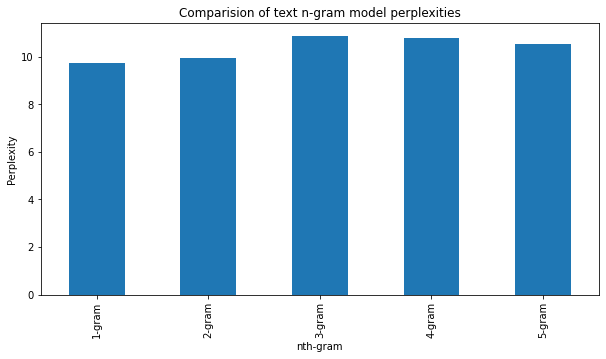

In [50]:
text_n_gram_perplexities = []
for n_value in n_values:
    text_n_gram_perplexities.append(clean_text_dev_perplexity[n_value])

freq_series = pd.Series(text_n_gram_perplexities)
x_labels = [f'{n_value}-gram' for n_value in n_values]
plt.figure(figsize=(10, 5))
ax = freq_series.plot(kind="bar")
ax.set_title("Comparision of text n-gram model perplexities")
ax.set_xlabel("nth-gram")
ax.set_ylabel("Perplexity")
ax.set_xticklabels(x_labels)
rects = ax.patches
plt.show()

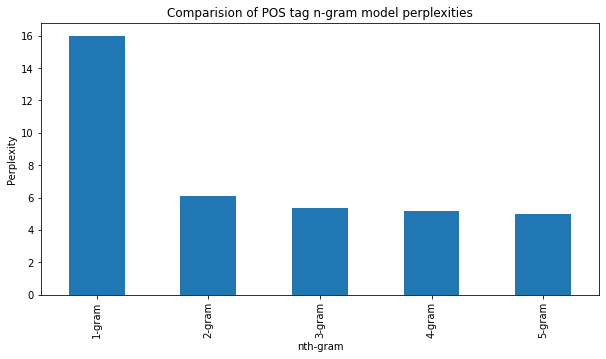

In [51]:
pos_perplexities = []
for n_value in n_values:
    pos_perplexities.append(clean_text_dev_pos_perplexity[n_value])

freq_series = pd.Series(pos_perplexities)
x_labels = [f'{n_value}-gram' for n_value in n_values]
plt.figure(figsize=(10, 5))
ax = freq_series.plot(kind="bar")
ax.set_title("Comparision of POS tag n-gram model perplexities")
ax.set_xlabel("nth-gram")
ax.set_ylabel("Perplexity")
ax.set_xticklabels(x_labels)
rects = ax.patches
plt.show()

## Evaluating unknown corpus

In [52]:
test_text_list = None
# test_text_list = ["In the country there lived a fox. The quick brown fox jump over the fence. " \
#                    "Farmer Shaun was terrified."]

if test_text_list is None:
    test_text_list = unknown_text_list
segmented_corpus, map_to_corpus_index = segmentation(test_text_list)
tokenized_corpus = tokenization(segmented_corpus)

Testing 1-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     669821


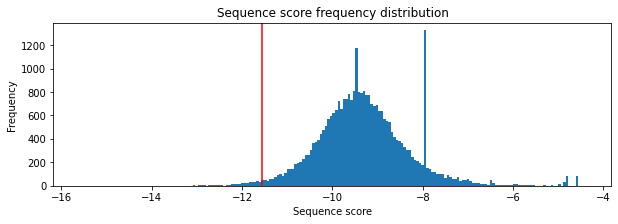

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       397/30868

Testing 2-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     700689


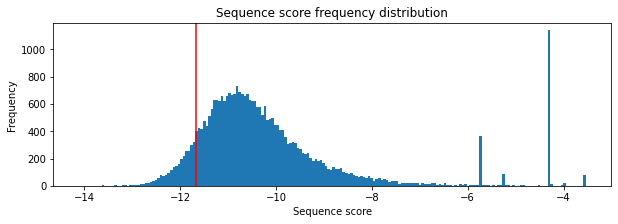

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       2731/30868

Testing 3-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     731557


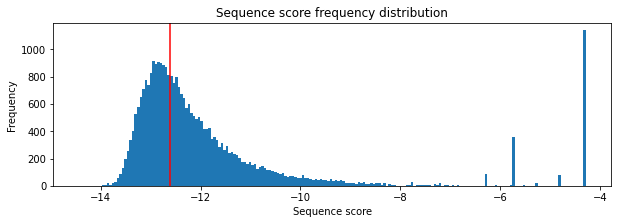

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       12521/30868

Testing 4-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     762425


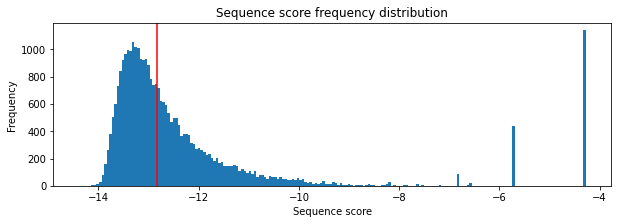

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       16519/30868

Testing 5-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     793293


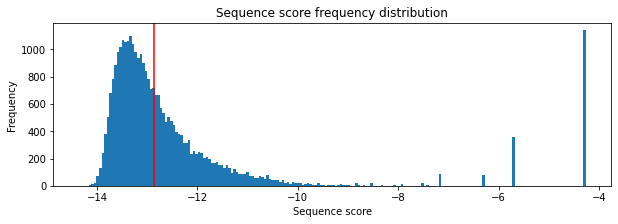

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       17559/30868



In [53]:
# Text n-gram model
ngram_results_text = test_lm(tokenized_corpus, n_values, ngram_data_text)
ngram_results_text['segmented_corpus'] = segmented_corpus

Replacing tokens with POS tags using spacy
Testing 1-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           676560
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     676560


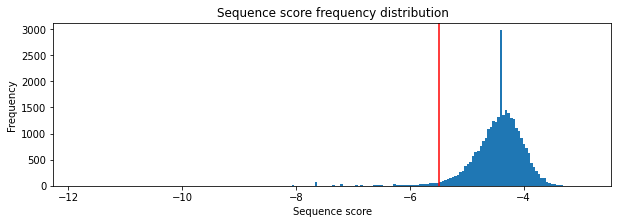

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       703/30868

Testing 2-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           676560
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     707428


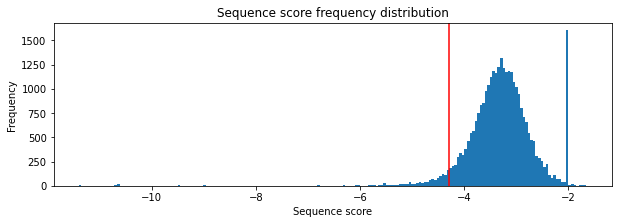

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       1262/30868

Testing 3-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           676560
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     738296


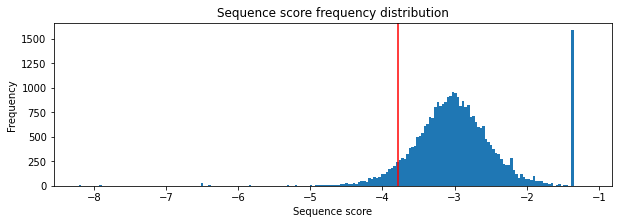

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       2031/30868

Testing 4-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           676560
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     769164


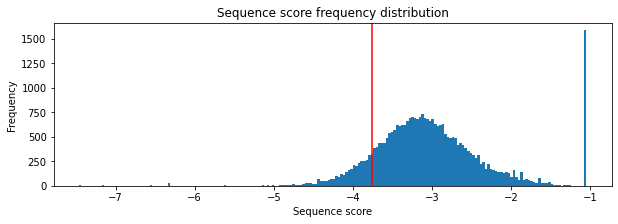

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       3607/30868

Testing 5-gram model
Sequences in corpus:                              30868
Total tokens in corpus:                           676560
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:                            30868
Total ngrams:                                     800032


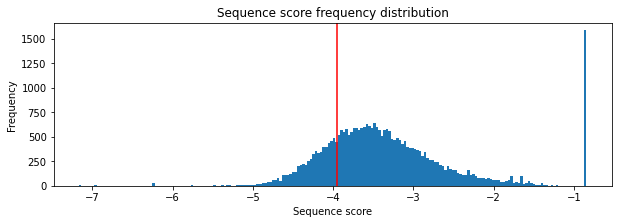

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:       6618/30868



In [54]:
# POS tag n-gram model
pos_corpus = convert_to_pos_tags(tokenized_corpus, pos_type=pos_type)
ngram_results_pos = test_lm(pos_corpus, n_values, ngram_data_pos)
ngram_results_pos['segmented_corpus'] = pos_corpus

In [55]:
print_stats(test_text_list, n_values, ngram_results_text)
# print_stats(test_text_list, n_values, ngram_results_text, indexes='all')
# print_stats(test_text_list, n_values, ngram_results_text, indexes=[i for i in range(min(3, len(test_text_list)))])

Total sequence generated from unknown corpus:	 30868
Total text files in unknown corpus:		 8698


,N-gram,Suspect sequences,Suspect files
0,1,397,380
1,2,2731,2191
2,3,12521,6173
3,4,16519,7029
4,5,17559,7225


In [56]:
print_stats(test_text_list, n_values, ngram_results_pos)
# print_stats(test_text_list, n_values, ngram_results_pos, indexes='all')
# print_stats(test_text_list, n_values, ngram_results_pos, indexes=[i for i in range(min(3, len(test_text_list)))])

Total sequence generated from unknown corpus:	 30868
Total text files in unknown corpus:		 8698


,N-gram,Suspect sequences,Suspect files
0,1,703,621
1,2,1262,1100
2,3,2031,1667
3,4,3607,2697
4,5,6618,4216


In [57]:
common_suspects = dict()
print(f"Size of combined suspect set:")
for n_value in n_values:
    common_suspects[n_value] = list(set(ngram_results_text[n_value]['suspect_corpus_index']) & set(ngram_results_pos[n_value]['suspect_corpus_index']))
    print(f"\t{n_value}-gram: {len(common_suspects[n_value])}/{len(test_text_list)}")

Size of combined suspect set:
	1-gram: 66/8698
	2-gram: 415/8698
	3-gram: 1320/8698
	4-gram: 2383/8698
	5-gram: 3910/8698


### Output

#### Displaying random segment classified as suspect by models

In [58]:
def print_corpus_text_from_suspect_sequence_index(index, corpus, n_value, ngram_results):
    n = len(ngram_results[n_value]['suspect_sequences_index'])
    if n == 0:
        return
    index %= n
    sequence_index = ngram_results[n_value]['suspect_sequences_index'][index]
    print('Segment text\n============\n', get_sentence_from_tokens(ngram_results_text[n_value]['padded_sequences'][sequence_index]))
    print('\nSegment POS tags\n================\n', get_sentence_from_tokens(ngram_results_pos[n_value]['padded_sequences'][sequence_index]))
    corpus_index = ngram_results[n_value]['map_to_corpus_index'][sequence_index]
    print('\nCorpus text\n===========\n', corpus[corpus_index])

In [59]:
# Print random suspected sequence
print_corpus_text_from_suspect_sequence_index(
    index=random.randint(0, len(ngram_results_text[n_value]['suspect_sequences_index'])), 
    corpus=test_text_list, n_value=n_values[-1], 
    ngram_results=ngram_results_text
)

Segment text
 As for himself , he just did n't have the temperament for it Froms the time he had been at college he had achieved a certain tranquility and composure by accepting the fact that there were certain things he could never know .

Segment POS tags
 IN IN PRP , PRP RB VBD RB VB DT NN IN PRP VBZ DT NN PRP VBD VBN IN NN PRP VBD VBN DT JJ NN CC NN IN VBG DT NN IN EX VBD JJ NNS PRP MD RB VB .

Corpus text
 ` ` I think I 'll sleep in this morning '' , she said drowsily , and as she snuggled against him , he wondered if she ever went to church . Why did he want her to go to churchest ? ? He wondered Probably because it was a place where she might get a feeling of certainty and security . It would bes good for her . It was too bad he had no feeling himself for church . Notter his poor mother 's fault . She would have been better off if she had stuck to her Bible . As for himself , he just did n't have the temperament for it Froms the time he had been at college he had achieved a cert

#### Testing if a sentence in corpus is classified as suspect by both models (text, POS tag)

In [60]:
# Check if sentence in test corpus is grammatically correct
corpus_index_to_check = 0
print(test_text_list[corpus_index_to_check])
for n_value in n_values:
    print(f'\t{n_value}-gram: \t{corpus_index_to_check not in common_suspects[n_value]}') 

The Fulton County Grand Jury say Friday an investigation of Atlanta 's recent primary election produced ` ` no evidence '' that any irregularities took place .
	1-gram: 	True
	2-gram: 	True
	3-gram: 	True
	4-gram: 	True
	5-gram: 	True


In [61]:
def suggest_corrections(strategy, n_value, ngram_data_text, ngram_data_pos, ngram_results_text, ngram_results_pos, print_limit=10):
    
    # results used for thresholding
    if strategy == 'pos':
        ngram_results = ngram_results_pos
        cutoff = ngram_data_pos[n_value]['score_cutoff']
    elif strategy == 'text':
        ngram_results = ngram_results_text
        cutoff = ngram_data_text[n_value]['score_cutoff']
    elif strategy == 'both':
        raise ValueError('strategy not implemented')
    print(f'Thresholding done using "{strategy}" sequence scores')
    print(f'{n_value}-gram cutoff:\t{cutoff}')
    
    data = {
        'Text': [],
        'Text score': [],
        'POS score': [],
        'Wrong token': [],
        'Wrong token score': [],
        'Wrong token POS': [],
        'Wrong token POS score': [],
        'Suggested token': []
    }    
    for index in ngram_results[n_value]['suspect_sequences_index']:
        
        token_scores = ngram_results[n_value]['sequence_token_scores'][index]
        min_val, min_idx = min((val, idx) for (idx, val) in enumerate(token_scores))
        # text_token_scores = ngram_results_text[n_value]['sequence_token_scores'][index]
        # min_text_token_val, min_text_token_idx = min((val, idx) for (idx, val) in enumerate(text_token_scores))
        
        data['Text'].append(ngram_results_text['segmented_corpus'][index])
        data['Text score'].append(ngram_results_text[n_value]['sequence_scores'][index])
        data['POS score'].append(ngram_results_pos[n_value]['sequence_scores'][index])
        data['Wrong token'].append(ngram_results_text[n_value]['ngram_sequences'][index][min_idx])
        data['Wrong token score'].append(ngram_results_text[n_value]['sequence_token_scores'][index][min_idx])
        data['Wrong token POS'].append(ngram_results_pos[n_value]['ngram_sequences'][index][min_idx])
        data['Wrong token POS score'].append(min_val)
        
        if strategy == 'pos':
            # Get highest P(pos|pos_context)
            pos_gram = ngram_results_pos[n_value]['ngram_sequences'][index][min_idx]
            try:
                suggested_pos_token = ngram_data_pos[n_value]['model'].counts[pos_gram[:-1]].max()
            except:
                suggested_pos_token = None
            # Get highest P(text|pos)
            suggested_text_token = suggested_pos_token
            data['Suggested token'].append(suggested_text_token)
        elif strategy == 'text':
            # Get highest P(text|text_context)
            text_gram = ngram_results_text[n_value]['ngram_sequences'][index][min_idx]
            try:
                suggested_text_token = ngram_data_text[n_value]['model'].counts[text_gram[:-1]].max()
            except:
                suggested_text_token = None
            data['Suggested token'].append(suggested_text_token)
        elif strategy == 'both':
            raise ValueError('strategy not implemented')
            
        print_limit -= 1
        if print_limit <= 0:
            break
            
    display(pd.DataFrame(data))

    for text in data['Text']:
        print(text, end='\n\n')
    
suggest_corrections('pos', 4, ngram_data_text, ngram_data_pos, ngram_results_text, ngram_results_pos, print_limit=20)

Thresholding done using "pos" sequence scores
4-gram cutoff:	-3.7514930873713044


,Text,Text score,POS score,Wrong token,Wrong token score,Wrong token POS,Wrong token POS score,Suggested token
0,Regarding Atlanta 's new multi - million - dol...,-13.358014,-4.011087,"(`, `, that, when)",-14.189130,"(``, ``, IN, WRB)",-8.675957,DT
1,"Let her call Crosson if she wanted to , let Cr...",-13.251714,-4.343797,"(she, wanted, to, ,)",-14.188821,"(PRP, VBD, TO, ,)",-8.383704,VB
2,He plus tried to ignore what his own common se...,-12.918217,-3.820176,"(<s>, <s>, He, plus)",-14.286774,"(<s>, <s>, PRP, CC)",-8.122742,VBD
3,"Nothing bald , openest ; ; but enough .",-12.064161,-4.224297,"(;, but, enough, .)",-14.188821,"(:, CC, RB, .)",-6.832890,IN
4,She was married to him for better or for worse .,-12.136678,-3.818515,"(to, him, for, better)",-14.188898,"(IN, PRP, IN, RBR)",-8.271463,DT
5,She would n't 21-2 be wilfully planning his de...,-12.123187,-3.787354,"(She, would, n't, 21-2)",-14.188898,"(PRP, MD, RB, CD)",-9.339850,VB
6,"What was that old sign ,s supposed to be paint...",-13.390245,-3.863370,"(sign, ,, s, supposed)",-14.188821,"(NN, ,, PRP, VBN)",-9.419960,VBD
7,"Why , Holden to himself , surprised at his own...",-13.438067,-3.967397,"(as, happy, as, can)",-14.188898,"(RB, JJ, IN, MD)",-9.584963,DT
8,Good --ed bye .,-10.105562,-4.228737,"(<s>, <s>, <s>, Good)",-12.427542,"(<s>, <s>, <s>, UH)",-7.740390,DT
9,Glad see you go .,-10.962142,-3.979735,"(<s>, <s>, Glad, see)",-14.288650,"(<s>, <s>, NNP, VB)",-10.088788,VBD


Regarding Atlanta 's new multi - million - dollar airport , the jury recommended ` ` that when the new sandra management takes charge Jan. 1 the airport be operated in a manner that will eliminate political influences '' .

Let her call Crosson if she wanted to , let Crosson raise the roof or even can him , he did n't care macdonald's .

He plus tried to ignore what his own common sense told him , but it was n't possible ; ; her returning motives were too blatant .

Nothing bald , openest ; ; but enough .

She was married to him for better or for worse .

She would n't 21-2 be wilfully planning his destruction .

What was that old sign ,s supposed to be painted over a door somewhere , Abandon hope , all ye who enter here ?

Why , Holden to himself , surprised at his own sudden insight , I 'll bet some of those people who enter are just as happy as can be .

Good --ed bye .

Glad see you go .

`s ` They were all faded .

` ` Why onning earth did I send him off to work ?

?ed Different a

### Saving model

In [62]:
import dill as pickle 

os.makedirs(os.path.join(BASE_DIR, 'models'), exist_ok=True)

for n_value in n_values:
    with open(os.path.join(BASE_DIR, 'models', f'{n_value}_gram_text.pkl'), 'wb') as fout:
        pickle.dump(ngram_data_text[n_value]['model'], fout)
        
for n_value in n_values:
    with open(os.path.join(BASE_DIR, 'models', f'{n_value}_gram_pos.pkl'), 'wb') as fout:
        pickle.dump(ngram_data_pos[n_value]['model'], fout)

## Contribution
- Adarsh Nandanwar [2018A7PS0396G] - Language Model (n-gram) Train and Test, Language Model Evaluation
- Yash Narang [2018A7PS0150G] - POS Tagging: Hidden Markov Model
- Manav Mehta [2018A7PS0164G] - Dataset Analysis
- Aditya Jain [2018A7PS0243G] - POS Tagging: Spacy, Perplexity Calculation
- Pranav Gaur [2018A7PS0099G] - POS Tagging: Spacy, Perplexity Calculation